In [1]:
from tensor import *
from module import *
from keras.datasets import mnist
import keras
import numpy as np

2023-05-24 21:14:01.318284: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 21:14:01.371754: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 21:14:01.373015: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 21:14:02.576707: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
train_images = np.asarray(x_train, dtype=np.float32) / 255.0
test_images = np.asarray(x_test, dtype=np.float32) / 255.0
train_images = train_images.reshape(60000,784)
test_images = test_images.reshape(10000,784)
y_train = keras.utils.to_categorical(y_train)

In [3]:
def compute_loss(outputs, labels):
    # Avoid numerical instability by adding a small epsilon value
    epsilon = 1e-10

    # Apply softmax to convert logits into probabilities
    softmax_outputs = np.exp(outputs) / np.sum(np.exp(outputs), axis=1, keepdims=True)

    # Calculate the cross-entropy loss
    loss = -np.sum(labels * np.log(softmax_outputs + epsilon)) / outputs.shape[0]
    return loss

def compute_loss(outputs, labels):
    epsilon = 1e-10
    log_probs =  (outputs.softmax()  + epsilon ).log()
    return -(labels*log_probs).sum(axis = 1).sum() / outputs.shape[0]

def accuracy(outputs, labels):
	batch_size = labels.shape[0]
	acc = np.sum(np.argmax(outputs.data,axis=1) == np.argmax(labels.data,axis=1))/batch_size
	return acc

In [4]:

model = Sequential(Linear(784, 20),ReLU(), Linear(20,10))	
optimizer = SGD(model.parameters(), lr = 0.1, momentum= 0.1)
criterion = CrossEntropyLoss()

In [5]:
batch_size = 32
steps = 2000
Wb = Tensor(np.random.randn(784,10))# new initialized weights for gradient descent
l,a = 0, 0
for step in range(steps):
  
  optimizer.zero_grad()
  ri = np.random.permutation(train_images.shape[0])[:batch_size]
  Xb, yb = Tensor(train_images[ri], label="layer1 input"), Tensor(y_train[ri])
  y_predW = model(Xb)

  loss = criterion(y_predW,yb)
  loss.backward()
  a += accuracy(y_predW,yb)
  l += loss.data

  if step%100==99:
    print(f'step {step} loss {l/100} acc {a/100}')
    l,a = 0,0
  optimizer.step()


step 99 loss 1.9698256112194465 acc 0.3715625
step 199 loss 0.8240575606965405 acc 0.7571875
step 299 loss 0.4998731292490469 acc 0.8496875
step 399 loss 0.4198000422675957 acc 0.8784375
step 499 loss 0.41954065511211447 acc 0.8859375
step 599 loss 0.39079966175342556 acc 0.8828125
step 699 loss 0.3369248510552576 acc 0.90375
step 799 loss 0.3280999042010033 acc 0.90375
step 899 loss 0.3503097321752325 acc 0.904375
step 999 loss 0.3333246192055777 acc 0.9015625
step 1099 loss 0.30752519762538966 acc 0.9134375
step 1199 loss 0.29388510711363985 acc 0.914375
step 1299 loss 0.2845478511613293 acc 0.9203125
step 1399 loss 0.2775140610105372 acc 0.91875
step 1499 loss 0.26597394060787866 acc 0.921875
step 1599 loss 0.2659176294601261 acc 0.9184375
step 1699 loss 0.2718847305507944 acc 0.925625
step 1799 loss 0.2306127412249346 acc 0.93125
step 1899 loss 0.23184619667051914 acc 0.931875
step 1999 loss 0.2864257448878045 acc 0.9159375


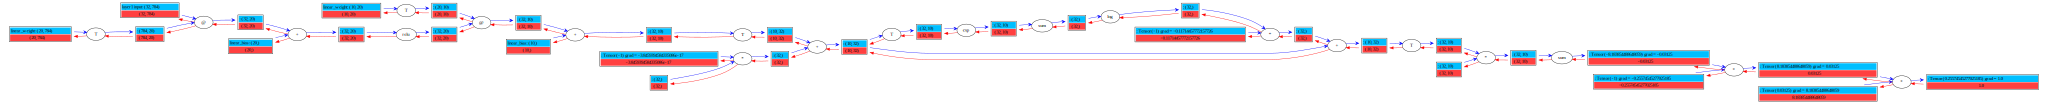

In [6]:
loss.visualize()

In [7]:
loss

Tensor(0.25574545277025185) grad = 1.0

In [8]:
from sklearn.metrics import accuracy_score
print(f'accuracy on test data is {accuracy_score(np.argmax(model(Tensor(test_images)).data,axis = 1),y_test)*100} %')

accuracy on test data is 93.13 %
